In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data/text.csv")

In [3]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
df.describe(include='all')


,category,text
count,2225,2225
unique,5,2126
top,sport,kennedy questions trust of blair lib dem leade...
freq,511,2


In [5]:
df.shape

(2225, 2)

In [6]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [8]:
df.isnull().sum()

category    0
text        0
dtype: int64

(array([401.,   0., 510.,   0.,   0., 511.,   0., 386.,   0., 417.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

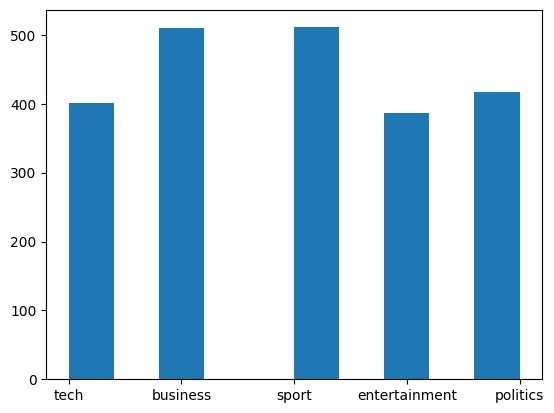

In [9]:
plt.hist(df['category'])

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['category']=encoder.fit_transform(df['category'])


In [12]:
df.head()

,category,text
0,4,tv future in the hands of viewers with home th...
1,0,worldcom boss left books alone former worldc...
2,3,tigers wary of farrell gamble leicester say ...
3,3,yeading face newcastle in fa cup premiership s...
4,1,ocean s twelve raids box office ocean s twelve...


In [13]:
df['category'].value_counts()

3    511
0    510
2    417
4    401
1    386
Name: category, dtype: int64

In [14]:
df.duplicated().sum()

99

In [15]:
df = df.drop_duplicates(keep = "first")

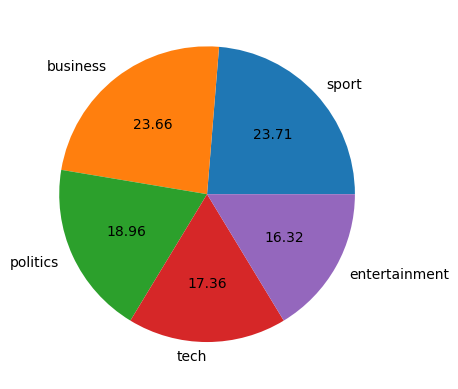

In [16]:

plt.pie(df['category'].value_counts(),labels = ['sport','business','politics','tech','entertainment'],autopct="%0.2f")
plt.show()

In [17]:
import nltk


In [18]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
ps= PorterStemmer()

In [19]:
def lemmatization(text):
    lm= WordNetLemmatizer()
    text = ' '.join([lm.lemmatize(word, pos='v') for word in text.split()])
    return text

In [20]:
df['text']= df['text'].apply(lemmatization)
df.head()

,category,text
0,4,tv future in the hand of viewers with home the...
1,0,worldcom boss leave book alone former worldcom...
2,3,tigers wary of farrell gamble leicester say th...
3,3,yeading face newcastle in fa cup premiership s...
4,1,ocean s twelve raid box office ocean s twelve ...


In [21]:
def text_transform(text):
    text= text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)

In [22]:
text_transform("Today we are going to analyse different text classification algorithms")

'today go analys differ text classif algorithm'

In [23]:
df['transformed text']=df['text'].apply(text_transform)

In [25]:
df['transformed text']=df['transformed text'].apply(lemmatization)


In [27]:
df.head()

,category,text,transformed text
0,4,tv future in the hand of viewers with home the...,tv futur hand viewer home theatr system plasma...
1,0,worldcom boss leave book alone former worldcom...,worldcom boss leav book alon former worldcom b...
2,3,tigers wary of farrell gamble leicester say th...,tiger wari farrel gambl leicest say rush make ...
3,3,yeading face newcastle in fa cup premiership s...,yead face newcastl fa cup premiership side new...
4,1,ocean s twelve raid box office ocean s twelve ...,ocean twelv raid box offic ocean twelv crime c...


In [53]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [54]:
business_wc = wc.generate(df[df['category']==0]['transformed text'].str.cat(sep=" "))



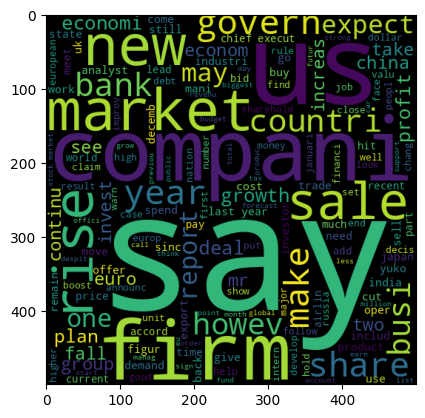

In [55]:
plt.imshow(business_wc)

In [56]:
entertainment_wc = wc.generate(df[df['category']==1]['transformed text'].str.cat(sep=" "))


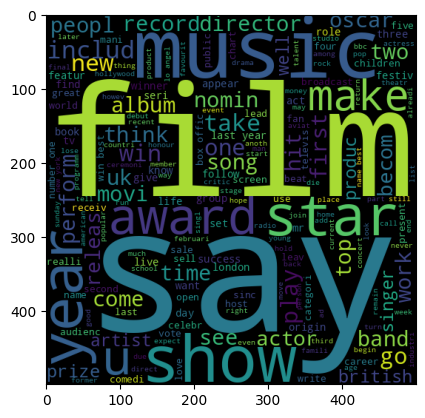

In [57]:
plt.imshow(entertainment_wc)

In [58]:
politics_wc = wc.generate(df[df['category']==2]['transformed text'].str.cat(sep=" "))


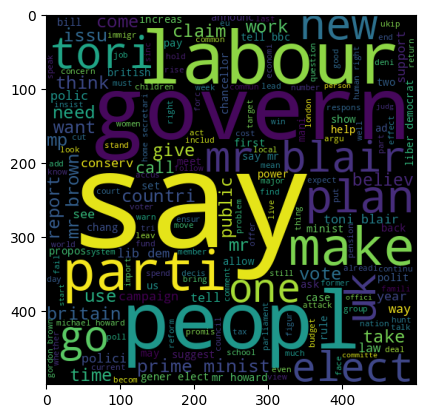

In [59]:
plt.imshow(politics_wc)

In [60]:
sports_wc = wc.generate(df[df['category']==3]['transformed text'].str.cat(sep=" "))


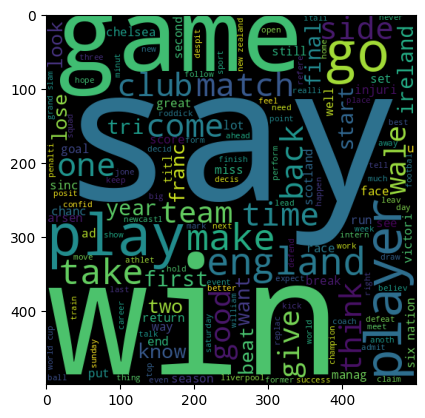

In [61]:
plt.imshow(sports_wc)

In [62]:
tech_wc = wc.generate(df[df['category']==4]['transformed text'].str.cat(sep=" "))

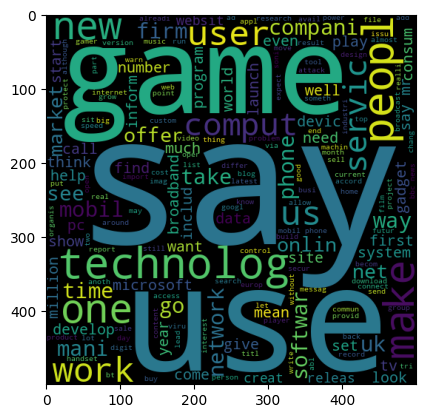

In [63]:
plt.imshow(tech_wc)

# Cleaning and Preprocessing is done

In [72]:
df = df[['category','transformed text']]

In [73]:
df.head()

,category,transformed text
0,4,tv futur hand viewer home theatr system plasma...
1,0,worldcom boss leav book alon former worldcom b...
2,3,tiger wari farrel gambl leicest say rush make ...
3,3,yead face newcastl fa cup premiership side new...
4,1,ocean twelv raid box offic ocean twelv crime c...


# Creating new file with cleaned text for making future models

In [74]:
df.to_csv('data/cleaned_text.csv', sep=',', index=False, encoding='utf-8')

In [64]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [65]:
X= tfidf.fit_transform(df['transformed text']).toarray()
y= df['category'].values

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
bnb= BernoulliNB()
mnb= MultinomialNB()

In [44]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1, average = 'weighted'))

0.9084507042253521
[[ 79   3   5   0   9]
 [  0  61   2   0   5]
 [  4   3  76   0   0]
 [  0   1   0 107   1]
 [  4   1   1   0  64]]
0.9110151518235229


In [45]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2, average = 'weighted'))

0.971830985915493
[[ 94   0   1   0   1]
 [  0  66   2   0   0]
 [  3   0  79   1   0]
 [  0   0   0 109   0]
 [  1   1   1   1  66]]
0.9719670591468543


In [46]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3, average = 'weighted'))

0.9624413145539906
[[ 93   0   1   0   2]
 [  0  67   0   0   1]
 [  1   2  80   0   0]
 [  0   0   0 109   0]
 [  5   3   1   0  61]]
0.9628027129476374


# Multinomial Naive Bayes gives the best accuracy